In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from lsst.all_sky_phot.star_catalog import read_simbad
from scipy.stats import iqr

In [2]:
bsc = read_simbad(isolate_catalog=True, isolate_radius=20.)


In [3]:
data = np.load('L3phot.npz')
phot_tables = data['phot_tables'].copy()
data.close()

In [4]:
# Let's set up an array to hold everything
phot_array = np.zeros((bsc.size, len(phot_tables)), dtype=float)
phot_tables[0]

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,residual_aperture_sum,annulus_median,aperture_bkg2,aperture_sum_bkgsub2,catalog_indx,az,alt
,pix,pix,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
1,2138.186393290717,1406.0974091027192,152254.588799,308767.937069,897.756901866,1924.5,151149.876546,1104.71225279,24,312.627098409,18.8463782045
2,2113.6613028894067,1401.51232326101,149018.713164,301727.023678,1113.30940027,1886.0,148126.093617,892.619547009,25,312.616625297,21.0723546769
3,2105.2638505739965,1397.829477287411,148528.377127,301613.856561,678.447440309,1888.0,148283.173249,245.203877764,26,312.488114059,21.844903237
4,2110.507493442797,1390.7577145637922,148911.97384,302987.359307,388.758492841,1893.5,148715.142239,196.831600333,27,312.011025364,21.4747650644
5,2116.296690921478,1373.1985720982634,149897.743531,305514.179966,135.890605882,1902.0,149382.730678,515.012852363,28,310.912427369,21.1483993542
6,2081.237684708381,1379.312507327185,145790.165038,300566.618762,-1546.41278691,1863.0,146319.677841,-529.512803206,29,311.625326765,24.0634675521
7,2086.538170741269,1375.208023887104,149279.89461,299934.184715,2253.33347512,1872.0,147026.536188,2253.35842211,30,311.317826277,23.6650430621
8,2096.3403499675196,1379.5098331790925,151425.276035,303182.293219,2806.5048497,1884.0,147969.013984,3456.26205127,31,311.480434026,22.8007047551


In [5]:
for i, phot_table in enumerate(phot_tables):
    phot_array[phot_table['catalog_indx'].data, i] = phot_table['aperture_sum_bkgsub2']

In [6]:
bsc_indx = np.arange(bsc.size)
has_obs = np.where(phot_array.sum(axis=1) > 0)[0]
phot_array = phot_array[has_obs, :]
bsc_indx = bsc_indx[has_obs]

mag_array = -2.5*np.log10(phot_array)

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [7]:
rmss = np.apply_along_axis(iqr, 1, mag_array, scale='normal')

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/lib/function_base.py:4387: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [8]:
rmss
median_mags = np.median(mag_array, axis=1)
real = ~np.isnan(median_mags)
zp = np.median(bsc['Vmag'][bsc_indx][real] - median_mags[real])

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 2494 results
  r = func(a, **kwargs)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


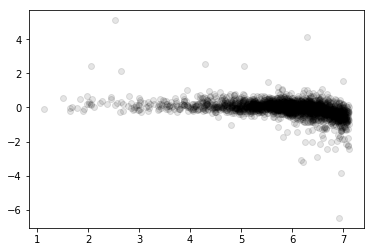

In [9]:
plt.plot(bsc['Vmag'][bsc_indx], median_mags-bsc['Vmag'][bsc_indx]+zp, 'ko', alpha=.1)

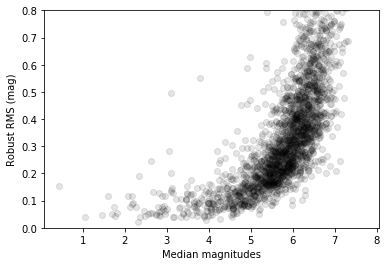

In [10]:
plt.plot(median_mags+zp, rmss, 'ko', alpha=.1)
plt.ylim([0,0.8])
plt.xlabel('Median magnitudes')
plt.ylabel('Robust RMS (mag)')

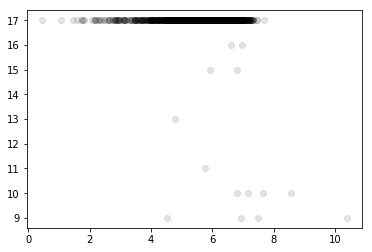

In [11]:
count = mag_array.copy()
count[np.isnan(count)] = 0
count[np.isinf(count)] = 0
count[np.where(count != 0)] = 1
count = count.sum(axis=1)
plt.plot(median_mags+zp, count, 'ko', alpha=.1)

In [ ]:
# I should go through each frame and make a transparency map

In [12]:
np.where( (median_mags+zp >3) &(median_mags+zp < 3.5))

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([  93,  412,  599,  696, 1135, 1315, 1411, 1589, 1659, 1757, 1767,
        1928, 2277, 2297, 2499, 2715, 3092, 3173, 3269, 3603, 3753, 3756,
        3825, 4181, 4283, 4408]),)

In [28]:
i=3825
np.std(mag_array[i,:]), iqr(mag_array[i,:], scale='normal')

(0.12380355056975396, 0.1316208832603934)

In [29]:
mag_array[i,:]+zp

array([ 2.99394162,  3.05123394,  3.08295629,  3.122527  ,  3.2382477 ,
        3.20565277,  3.27724248,  3.24421211,  3.34916441,  3.43347148,
        3.10410174,  3.12801974,  3.06069383,  3.10304336,  3.09434018,
        2.98269282,  3.00265745])